# Tokenizer experiments

In [2]:
interesting_text_1 = '''Sodium hypochlorite (commonly known in a dilute solution as bleach) is an inorganic chemical compound with the formula NaOCl (or NaClO), 
                      comprising a sodium cation (Na+) and a hypochlorite anion (OCl− or ClO−). '''


In [3]:
exclude_str = "’+-−.,!?:;@#\$%\'\"\^&*_=\\|/<>\[\]\(\)\n\t"

In [4]:
from transformers import AutoTokenizer, PreTrainedTokenizer

from transformers import BertTokenizer
from transformers import BartTokenizer
from transformers import XLNetTokenizer
from transformers import RobertaTokenizer
from transformers import ElectraTokenizer
from transformers import DistilBertTokenizer
from transformers import T5Tokenizer

tokenizer_bart = AutoTokenizer.from_pretrained('facebook/bart-large-cnn')

tokenizer_t5 = AutoTokenizer.from_pretrained('t5-base')
tokenizer_bert = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer_xlnet = AutoTokenizer.from_pretrained("xlnet-base-cased")
tokenizer_roberta = AutoTokenizer.from_pretrained("roberta-large")
tokenizer_electra = AutoTokenizer.from_pretrained("google/electra-large-generator")
tokenizer_distilbert = AutoTokenizer.from_pretrained("distilbert-base-cased")


Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/663 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [5]:
from transformers import EncoderDecoderModel, AutoModel

In [ ]:
vars(AutoModel.from_pretrained('bert-base-cased'))

In [ ]:
vars(AutoModel.from_pretrained('facebook/bart-large-cnn'))

In [6]:
def count_text_tokens_default(text):
    import re
    l = re.findall(r"[\w]+|[’+-−.,!?:;@#\$%\'\"\^&*_=\\|/<>\[\]\(\)\n\t]", text)
    #l = re.findall(r"[\W]+\s", text)
    return len(l), l

def print_sentence_statistics(text):
    l, l2 = count_text_tokens_default(text)
    print(f'Reference')
    print(f'Num splits: {str(l)}')
    print(f'Tokens split: {" ".join(l2)}')
    
def count_text_tokens_with_tokenizer(tokenizer, text):
    _, default_tokens = count_text_tokens_default(text)
    split_words_counter = dict()
    for tok in default_tokens:
        if len(tokenizer.tokenize(tok)) != 1:
            if tok not in split_words_counter:
                split_words_counter[tok] = 1
            else:
                split_words_counter[tok] += 1
    
    tokenized_tokens = tokenizer(text, return_length=True, max_length=4096, truncation=True)
    return tokenized_tokens.length[0], tokenized_tokens.input_ids, split_words_counter

def count_text_tokens_with_tokenizer_simple(tokenizer, text):
    tokenized_tokens = tokenizer(text, return_length=True, max_length=4096, truncation=True)
    return tokenized_tokens.length[0]

def count_text_tokens_with_tokenizer_fast(tokenizer, text):
    _, default_tokens = count_text_tokens_default(text)
    split_words_counter = dict()
    counter = 0
    for tok in default_tokens:
        tokens = tokenizer.tokenize(tok)
        l = len(tokens)
        counter += l
        if l != 1:
            if tok not in split_words_counter:
                split_words_counter[tok] = 1
            else:
                split_words_counter[tok] += 1
    
    return counter, split_words_counter

def test_tokenize(tokenizer, text):
    t, i, j = count_text_tokens_with_tokenizer(tokenizer, text)
    print(f'\033[1mTokenizer name: {tokenizer.name_or_path} vocab_size: {tokenizer.vocab_size}\033[0m')
    print(f'Num tokens: {t}')
    print('-' * 160)
    print(f'Tokens input_ids: {i}')
    print('-' * 160)
    print(f'Unknown tokens in text: {j}')
    print('=' * 160)

In [7]:
def print_test_info(text):
    print(f'Original: {text}')
    print('=' * 160)
    print_sentence_statistics(text)
    print('=' * 160)
    tok_lists = [tokenizer_bart, tokenizer_bert, tokenizer_xlnet, tokenizer_roberta, tokenizer_electra, tokenizer_distilbert]
    for tok in tok_lists:
        test_tokenize(tok, text)


In [8]:
print_test_info('hypochlorite comprehension ransomware bully hammer seahorse disciplinary membership') # hypo chlor ite

Original: hypochlorite comprehension ransomware bully hammer seahorse disciplinary membership
Reference
Num splits: 8
Tokens split: hypochlorite comprehension ransomware bully hammer seahorse disciplinary membership
Tokenizer name: facebook/bart-large-cnn vocab_size: 50265
Num tokens: 15
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Tokens input_ids: [0, 33027, 4306, 10159, 1459, 40494, 25346, 23934, 13547, 842, 895, 27209, 13999, 6332, 2]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Unknown tokens in text: {'hypochlorite': 1, 'comprehension': 1, 'ransomware': 1, 'bully': 1, 'seahorse': 1, 'membership': 1}
Tokenizer name: bert-base-cased vocab_size: 28996
Num tokens: 20
------------------------------------------------------------------------------------------

In [9]:
print_test_info('across injury guilty following') 

Original: across injury guilty following
Reference
Num splits: 4
Tokens split: across injury guilty following
Tokenizer name: facebook/bart-large-cnn vocab_size: 50265
Num tokens: 7
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Tokens input_ids: [0, 1043, 14500, 1356, 2181, 511, 2]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Unknown tokens in text: {'across': 1, 'injury': 1, 'guilty': 1, 'following': 1}
Tokenizer name: bert-base-cased vocab_size: 28996
Num tokens: 6
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Tokens input_ids: [101, 1506, 3773, 5425, 1378, 102]
-----------------------------------------------------------------------------------

In [ ]:
print_test_info(interesting_text_1)

# DATASETS TOKEN EVALUATION

In [5]:
from datasets import load_dataset, load_metric

cnn_datasets = load_dataset('cnn_dailymail', '3.0.0')
xsum_datasets = load_dataset("xsum")

Reusing dataset cnn_dailymail (/home/azureuser/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de)


  0%|          | 0/3 [00:00<?, ?it/s]

Using custom data configuration default
Reusing dataset xsum (/home/azureuser/.cache/huggingface/datasets/xsum/default/1.2.0/32c23220eadddb1149b16ed2e9430a05293768cfffbdfd151058697d4c11f934)


  0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
def run_default_on_dataset(dataset, key1, key2):
    count_list = []
    tokens_list = []
    for text in dataset[key1][key2]:
        count, tokens = count_text_tokens_default(text)
        count_list.append(count)
        tokens_list.append(tokens)
    return count_list, tokens_list


In [204]:
def print_multiple_histo(data_list, xlabel, title, spread=4, outline=True):
    import numpy
    import math
    from matplotlib import pyplot as plt
    from scipy import stats
    
    avg_m = 0
    minn = math.inf
    maxx = -math.inf
    for data, _ in data_list:
        avg_m = max(avg_m, numpy.average(data))
        minn = min(minn, min(data))
        maxx = max(maxx, max(data))
        
    maxx = min(spread*avg_m, maxx)
    bins = numpy.linspace(math.ceil(minn), math.floor(maxx), max(50, math.floor(maxx * 0.05))) # fixed number of bins
    fig, ax = plt.subplots()
    for idx, data in enumerate(data_list):
        ax.hist(data[0], bins=bins, density=True, alpha=0.75, label=data[1])
        if outline:
            kde = stats.gaussian_kde(data[0])
            ax.plot(bins, kde(bins))

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    
    ax.legend(loc='upper right')
    plt.show()
    
def print_barplot(data_list, ylabel, title):
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(data_list[0], data_list[1])
  
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel(ylabel)
    
    #ax.legend(loc='upper right')
    plt.show()

# Collect tokens and print histograms for each dataset

Reference:
-----------------------------------------------------
| dataset    | key1       | key2       | avg tokens |
-----------------------------------------------------
| cnndm      | train      | article    | 825.77     |
| cnndm      | train      | highlights | 60.71      |
| cnndm      | validation | article    | 801.31     |
| cnndm      | validation | highlights | 67.76      |
| cnndm      | test       | article    | 810.92     |
| cnndm      | test       | highlights | 64.22      |
-----------------------------------------------------
vocabulary len 601068
-----------------------------------------------------
| xsum       | train      | document   | 462.53     |
| xsum       | train      | summary    | 24.34      |
| xsum       | validation | document   | 456.65     |
| xsum       | validation | summary    | 24.33      |
| xsum       | test       | document   | 465.49     |
| xsum       | test       | summary    | 24.32      |
-------------------------------------------------

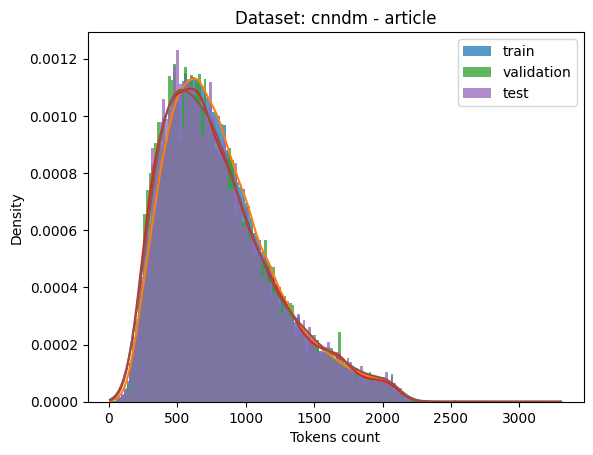

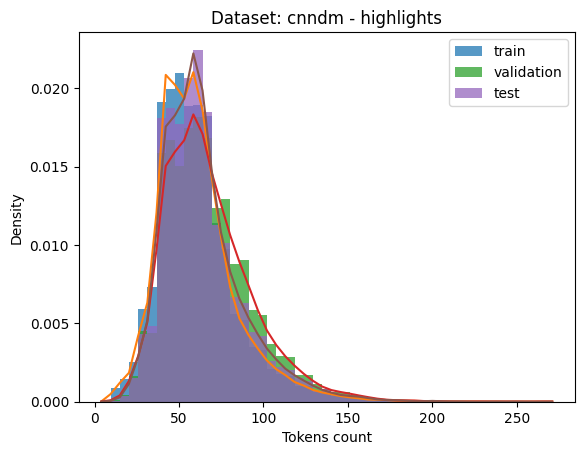

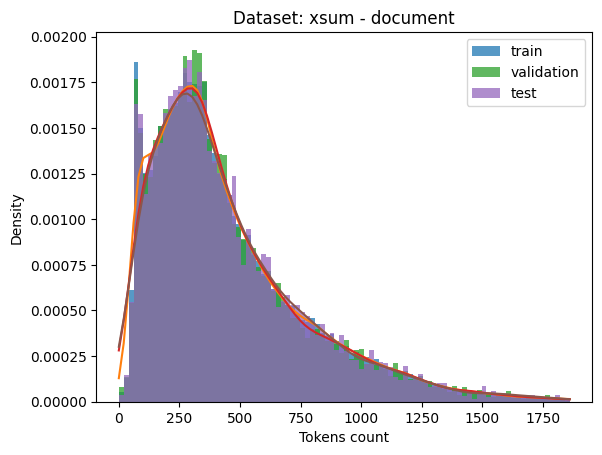

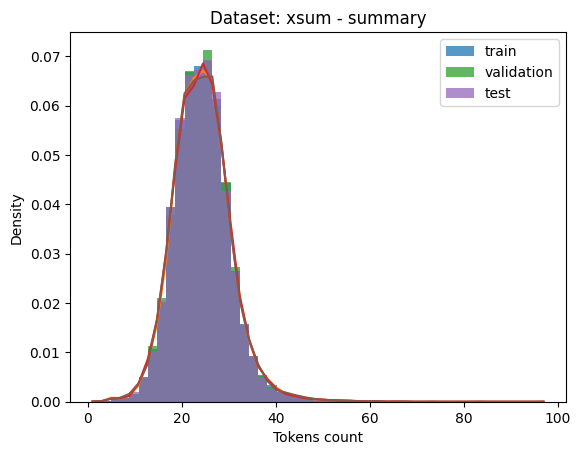

In [151]:
import numpy

def evaluate_tokens_for_each_dataset():
    datasets = [cnn_datasets, xsum_datasets]
    names = ["cnndm", "xsum"]
    types = ["train", "validation", "test"]
    keys = [["article", "highlights"], ["document", "summary"]]

    tokens_counter = [dict(), dict()]
    vocabulary_list = []
    count_list = []
    
    print(f'Reference:')
    print('-' * 53)
    print(f"| {'dataset':<10} | {'key1':<10} | {'key2':<10} | {'avg tokens':<10} |")
    for idx, dataset in enumerate(datasets):
        print('-' * 53)
        c_list = []
        for tp in types:
            for key in keys[idx]:
                count, tokens = run_default_on_dataset(dataset, tp, key)
                print(f'| {names[idx]:<10} | {tp:<10} | {key:<10} | {str(numpy.round(numpy.average(count), 2)):<10} |')
                c_list.append((count, tp))
                for sub in tokens:
                    for i in sub:
                        if i not in tokens_counter[idx]:
                            tokens_counter[idx][i] = 1
                        else:
                            tokens_counter[idx][i] += 1
        vocabulary_list.append(tokens_counter[idx].keys())
        count_list.append(c_list)
        print('-' * 53)
        print(f'vocabulary len {len(tokens_counter[idx])}')
    
    print('-' * 53)
    print('')
    print_multiple_histo([a for idx, a in enumerate(count_list[0]) if idx % 2 == 0], 'Tokens count', f'Dataset: {names[0]} - {keys[0][0]}')
    print('')
    print_multiple_histo([a for idx, a in enumerate(count_list[0]) if idx % 2 == 1], 'Tokens count', f'Dataset: {names[0]} - {keys[0][1]}')
    print('')
    print_multiple_histo([a for idx, a in enumerate(count_list[1]) if idx % 2 == 0], 'Tokens count', f'Dataset: {names[1]} - {keys[1][0]}')
    print('')
    print_multiple_histo([a for idx, a in enumerate(count_list[1]) if idx % 2 == 1], 'Tokens count', f'Dataset: {names[1]} - {keys[1][1]}')
    
    return tokens_counter, count_list, vocabulary_list
    
tokens_counter , count_list, vocabulary_list = evaluate_tokens_for_each_dataset()

Tokens analysis
dataset: cnndm


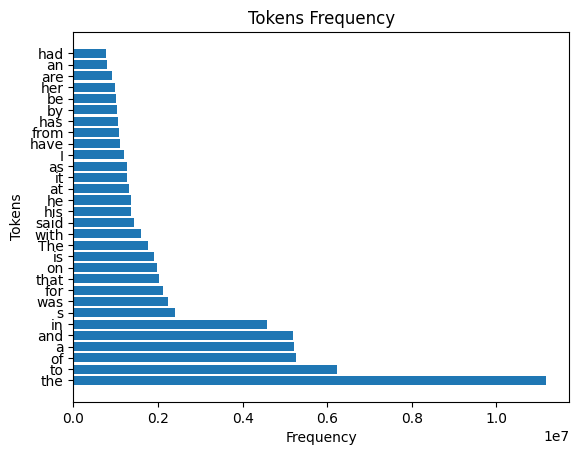


1 220451 ['Vichada', '754th', 'M136', 'BREMEN', 'Brasileirão', 'Lanús', 'Casciato', 'Bekham', 'ETTP', 'tanktops']
2 80981 ['Guainia', 'Leão', 'Ewerthon', 'Gulder', 'Dieci', 'Ayaa', 'ignorable', 'Deedes', 'Aree', 'Hissene']
3 43294 ['Ogadje', 'hepatobiliary', 'undemonstrated', 'Malfatti', 'Jahanaz', 'Vallese', 'Databank', 'iGen', 'CellarTracker', 'Mridha']
4 28520 ['Acacio', 'AT4', 'Moyock', 'Pornchai', 'Montanti', 'Vakulenko', 'Shmisani', 'Touqan', 'butyrate', 'Munaim']
5 20178 ['Babineau', 'Quanis', 'Fuerzas', 'Armadas', 'Revolucionarias', 'Batna', 'Moncier', 'diffidence', 'maims', 'dogcatcher']
6 16111 ['Ailton', 'varroa', 'Hamdaniya', 'Mahamat', 'Uncertainties', 'Herschelle', 'Blotting', 'unprecendented', 'Kvigne', 'dramatizations']
7 12476 ['Niranjan', 'IAPV', 'Taupin', 'Tutone', 'PHUKET', 'Gir', 'Aikin', 'Styris', 'Lazing', 'Toukan']
8 10450 ['Yanar', 'darlin', 'Schlecht', 'Invisalign', 'bumming', 'Ventriloquist', 'virtuosos', 'Sanitas', 'restrictionists', 'Tuusula']
9 8826 ['New

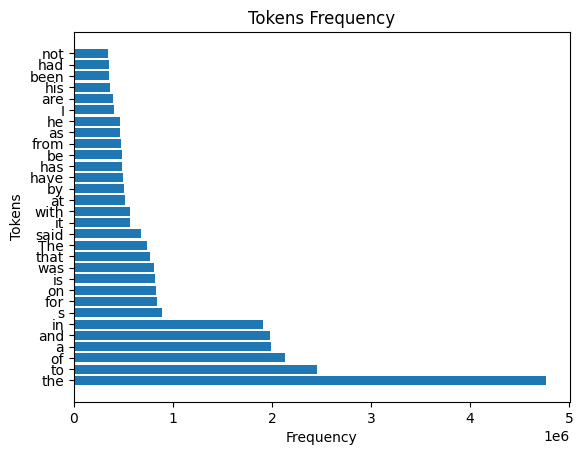


1 112866 ['077secs', '517secs', '064secs', 'Zekayi', '50kph', 'Panne', 'Seeber', 'spoofable', 'Airhead', 'Eudy']
2 41951 ['Cerahpasa', 'BBCNewsNI', 'bbcnewsni', 'Stunnell', 'Zweli', 'Mnisi', 'Ndumie', 'Funda', 'Watchtower', 'Grynhaus']
3 23426 ['Kutlubay', 'interoceanic', 'Noxolo', 'quarrelsome', 'Disembarking', 'Lezana', 'Gonzaga', 'adobe', 'Rafnes', '179th']
4 15451 ['Chango', '60kph', 'FAD', 'Nogwaza', 'KwaThema', 'Luleki', 'piggybacks', 'Overflow', 'oystercatchers', 'cockling']
5 11203 ['Peeblesshire', 'Cinnamon', 'Tract', 'unflashy', 'shirkers', 'Drenthe', 'Mateparae', 'Xeres', 'Zuhura', 'hangmen']
6 8603 ['cine', 'chipset', 'Maximino', 'Tlali', 'genera', 'Coincidence', 'Martello', '69mph', 'Clemency', '83mph']
7 6863 ['Weaknesses', 'Hsiung', 'skivers', 'uprating', 'Leadbetter', 'godwit', 'matchboxes', 'Tulse', 'Jelimo', 'Vinegar']
8 5482 ['dumfries', 'Alverez', 'Wevelgem', 'Myngheer', '590ft', 'anticipatory', 'craven', 'Glance', 'BBCTravelAlert', 'Motivation']
9 4774 ['RUAS', 'O

In [205]:
def analyse_tokens(tokens_counter):
    top_idx = 15
    bot_idx = 15
    max_print = 10

    datasets = [cnn_datasets, xsum_datasets]
    names = ["cnndm", "xsum"]
    #types = ["train", "validation", "test"]
    #keys = [["article", "highlights"], ["document", "summary"]]
    
    for idx, dataset in enumerate(datasets):
        print(f'dataset: {names[idx]}')
        
        inv_map = dict()
        for k in tokens_counter[idx]:
            v = tokens_counter[idx][k]
            if v not in inv_map:
                inv_map[v] = [k]
            else:
                inv_map[v].append(k)

        lst = tokens_counter[idx].values()
        vec = sorted(list(set(lst)))
    
        filtered_tokens_v = []
        filtered_tokens_c = []
        for i in vec[-50:]:
            if inv_map[i][0] not in exclude_str:
                filtered_tokens_v.append(inv_map[i][0])
                filtered_tokens_c.append(i)
        
        print_barplot([filtered_tokens_v[::-1][:30], filtered_tokens_c[::-1][:30]], 'Tokens', f'Tokens Frequency')
        print("")
        
        def print_token(dict_, i):
            l = len(dict_[i])
            c = dict_[i][:min(max_print, l)]
            if c[0] not in exclude_str:
                print(i, l, c)
        
        for i in vec[:top_idx]:
            print_token(inv_map, i)
            
        print('.' * 160)
        for i in vec[-bot_idx:]:
            print_token(inv_map, i)

        print('=' * 160)

print('Tokens analysis')
analyse_tokens(tokens_counter)

# Sentence Analysis

[nltk_data] Downloading package punkt to /home/azureuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentence count:
--------------------------------------------------------
| dataset    | key1       | key2       | avg sentences |
--------------------------------------------------------
| cnndm      | train      | article    | 38.86         |
| cnndm      | train      | highlights | 3.68          |
| cnndm      | validation | article    | 32.77         |
| cnndm      | validation | highlights | 4.0           |
| cnndm      | test       | article    | 33.34         |
| cnndm      | test       | highlights | 3.79          |
--------------------------------------------------------
| xsum       | train      | document   | 18.98         |
| xsum       | train      | summary    | 1.0           |
| xsum       | validation | document   | 18.65         |
| xsum       | validation | summary    | 1.0           |
| xsum       | test       | document   | 19.1          |
| xsum       | test       | summary    | 1.0           |
--------------------------------------------------------



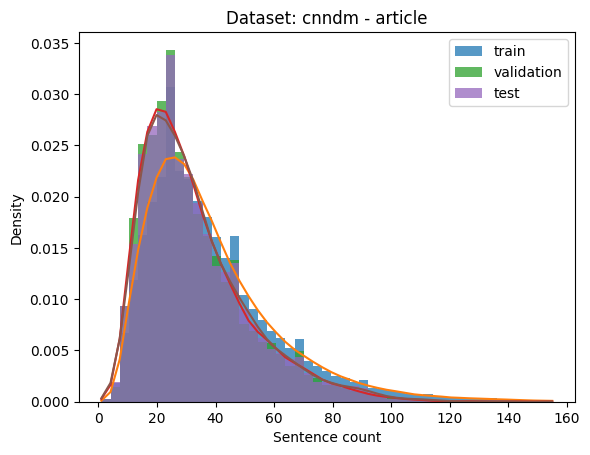

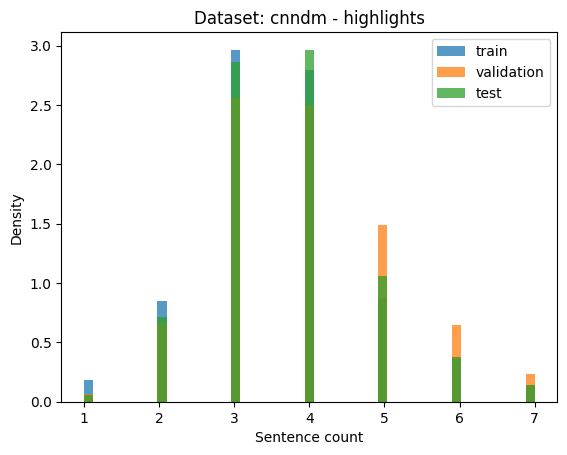

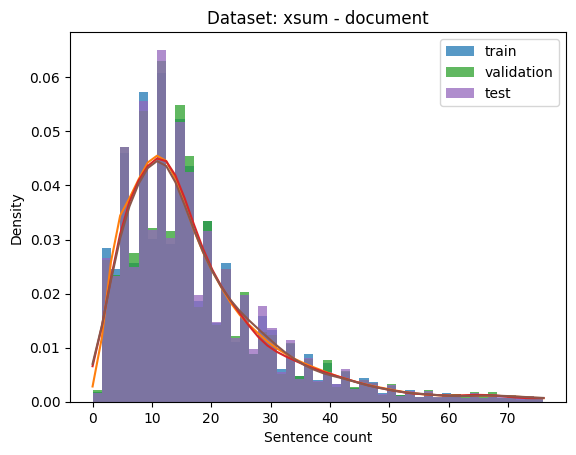

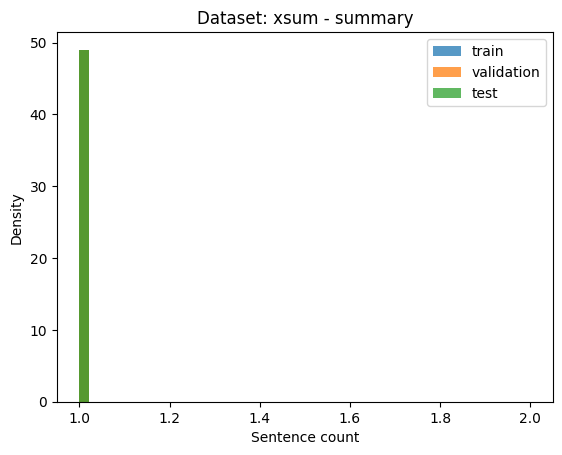

In [159]:
import nltk
nltk.download('punkt')

def count_sentences_on_dataset(dataset, key1, key2):
    count_list = []
    for text in dataset[key1][key2]:
        count_list.append(len(nltk.sent_tokenize(text)))
    return count_list

def evaluate_sentences_for_each_dataset():
    datasets = [cnn_datasets, xsum_datasets]
    names = ["cnndm", "xsum"]
    types = ["train", "validation", "test"]
    keys = [["article", "highlights"], ["document", "summary"]]

    count_list = []
    
    print(f'Sentence count:')
    print('-' * 56)
    print(f"| {'dataset':<10} | {'key1':<10} | {'key2':<10} | {'avg sentences':<10} |")
    for idx, dataset in enumerate(datasets):
        print('-' * 56)
        c_list = []
        for tp in types:
            for key in keys[idx]:
                count = count_sentences_on_dataset(dataset, tp, key)
                print(f'| {names[idx]:<10} | {tp:<10} | {key:<10} | {str(numpy.round(numpy.average(count), 2)):<13} |')
                c_list.append((count, tp))
        count_list.append(c_list)
    
    print('-' * 56)
    print('')
    print_multiple_histo([a for idx, a in enumerate(count_list[0]) if idx % 2 == 0], 'Sentence count', f'Dataset: {names[0]} - {keys[0][0]}')
    print('')
    print_multiple_histo([a for idx, a in enumerate(count_list[0]) if idx % 2 == 1], 'Sentence count', f'Dataset: {names[0]} - {keys[0][1]}', 2, False)
    print('')
    print_multiple_histo([a for idx, a in enumerate(count_list[1]) if idx % 2 == 0], 'Sentence count', f'Dataset: {names[1]} - {keys[1][0]}')
    print('')
    print_multiple_histo([a for idx, a in enumerate(count_list[1]) if idx % 2 == 1], 'Sentence count', f'Dataset: {names[1]} - {keys[1][1]}', 2, False)
    
    return count_list
    
sentence_count_list = evaluate_sentences_for_each_dataset()

# Print tokens for each tokenizor and compare charts to reference

In [349]:
def dataset_analysis_simple(tokenizer, dataset, key1, key2):
    import datetime
    count_list = []
    unknown_tokens = dict()
    start = datetime.datetime.utcnow()
    for text in dataset[key1][key2]:
        split_count = count_text_tokens_with_tokenizer_simple(tokenizer, text)
        count_list.append(split_count)
    end = datetime.datetime.utcnow()
    return end-start, count_list, unknown_tokens

def run_tokenizers_on_dataset_simple(tokenizer_list, dataset, key1, key2):
    count_list = []
    unknown_tokens = dict()
    print(f'| {"Tokenizer name":<33} | {"AVG tokens":<10} | {"Vocabulary size":<10} | {"Duration":<14} | {"":<120}')
    print('-' * 160)
    for tok in tokenizer_list:
        duration, split_list, unknown_dict = dataset_analysis_simple(tok, dataset, key1, key2)
        print(f'| {tok.name_or_path:<33} | {str(numpy.round(numpy.average(split_list), 2)):<10} | {tok.vocab_size:<15} | {str(duration):<14} |')  
        count_list.append(split_list)
    return count_list, unknown_tokens

def analyse_datasets_with_tokenizers_simple(tokenizer_list):
    tokens_counter = [dict(), dict()]

    datasets = [cnn_datasets, xsum_datasets]
    names = ["cnndm", "xsum"]
    types = ["train", "validation", "test"]
    keys = [["article", "highlights"], ["document", "summary"]]

    print(f'Tokenizer analysis:')
    print('-' * 160)
    print(f"| {'Dataset':<7} | {'key1':<10} | {'key2':<10} | {'':<120}")
    for idx, dataset in enumerate(datasets):
        print('-' * 160)
        for tp in types:
            for key in keys[idx]:
                print(f'| {names[idx]:<7} | {tp:<10} | {key:<10} | {"":<120}')
                print('-' * 160)
                count, unknown_dict = run_tokenizers_on_dataset_simple(tokenizer_list, dataset, tp, key)
                print('-' * 160)


In [350]:
analyse_datasets_with_tokenizers_simple([tokenizer_bart, tokenizer_bert, tokenizer_roberta,  tokenizer_xlnet, tokenizer_electra, tokenizer_distilbert])

Tokenizer analysis:
----------------------------------------------------------------------------------------------------------------------------------------------------------------
| Dataset | key1       | key2       |                                                                                                                         
----------------------------------------------------------------------------------------------------------------------------------------------------------------
| cnndm   | train      | article    |                                                                                                                         
----------------------------------------------------------------------------------------------------------------------------------------------------------------
| Tokenizer name                    | AVG tokens | Vocabulary size | Duration       |                                                                                              

In [371]:
def merge_dicts(dict1, dict2):
    dict3 = dict()
    for t in dict1:
        if t not in dict3:
            dict3[t] = dict1[t]
        else:
            dict3[t] += dict1[t]
    
    for t in dict2:
        if t not in dict3:
            dict3[t] = dict2[t]
        else:
            dict3[t] += dict2[t]
        
    return dict3

def dataset_analysis(tokenizer, dataset, key1, key2):
    import datetime
    count_list = []
    unknown_tokens = dict()
    start = datetime.datetime.utcnow()
    for text in dataset[key1][key2]:
        split_count, unknown_dict = count_text_tokens_with_tokenizer_fast(tokenizer, text)
        count_list.append(split_count)
        unknown_tokens = merge_dicts(unknown_tokens, unknown_dict)
    end = datetime.datetime.utcnow()
    return end-start, count_list, unknown_tokens

def run_tokenizers_on_dataset(tokenizer_list, dataset, key1, key2):
    count_list = []
    unknown_tokens = dict()
    print(f'| {"Tokenizer name":<33} | {"Vocabulary size":<10} | {"Status":<10} | {"Duration":<14} | {"":<120}')
    print('-' * 160)
    for tok in tokenizer_list:
        duration, split_list, unknown_dict = dataset_analysis(tok, dataset, key1, key2)
        print(f'| {tok.name_or_path:<33} | {tok.vocab_size:<15} | {"DONE":<10} | {str(duration):<14} |')
        count_list.append(split_list)
        unknown_tokens = merge_dicts(unknown_tokens, unknown_dict)
    return count_list, unknown_tokens

def analyse_datasets_with_tokenizers_words(tokenizer_list, dataset_list):
    print(f'Tokenizer analysis:')
    print('-' * 160)
    print(f"| {'Dataset':<7} | {'key1':<10} | {'key2':<10} | {'':<120}")
    for dataset in dataset_list:
        print('-' * 160)
        unknown_tokens = dict()
        for tp in dataset[2]:
            for key in dataset[3]:
                print(f'| {dataset[1]:<7} | {tp:<10} | {key:<10} | {"":<120}')
                print('-' * 160)
                count, unknown_dict = run_tokenizers_on_dataset(tokenizer_list, dataset[0], tp, key)
                unknown_tokens = merge_dicts(unknown_tokens, unknown_dict)
                print('-' * 160)

        inv_map = dict()
        for k in unknown_dict:
            v = unknown_dict[k]
            if v not in inv_map:
                inv_map[v] = [k]
            else:
                inv_map[v].append(k)

        lst = unknown_dict.values()
        vec = sorted(list(set(lst)))
        
        filtered_tokens_v = []
        filtered_tokens_c = []
        for i in vec[-50:]:
            if inv_map[i][0] not in exclude_str:
                filtered_tokens_v.append(inv_map[i][0])
                filtered_tokens_c.append(i)
        
        print_barplot([filtered_tokens_v[::-1][:30], filtered_tokens_c[::-1][:30]], 'Tokens', f'Tokens Frequency')
        print('')


Tokenizer analysis:
----------------------------------------------------------------------------------------------------------------------------------------------------------------
| Dataset | key1       | key2       |                                                                                                                         
(DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
}), 'cnndm', ['test'], ['article', 'highlights'])
----------------------------------------------------------------------------------------------------------------------------------------------------------------
| cnndm   | test       | article    |                                                                                   

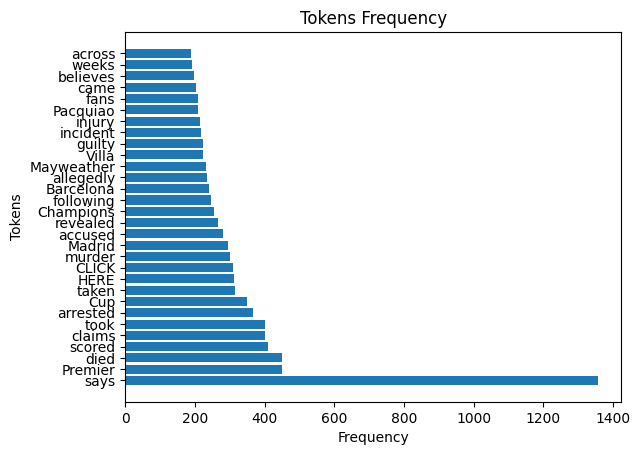

In [372]:
datasets = [(cnn_datasets, "cnndm",  ['test'], ["article", "highlights"])]
#[(cnn_datasets, "cnndm", ["train", "validation", "test"], ["article", "highlights"]), (xsum_datasets,"xsum", ["train", "validation", "test"], ["document", "summary"])]
tokenizer_list = [tokenizer_bart]

analyse_datasets_with_tokenizers_words(tokenizer_list, datasets)